In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib as plt
from utils.quaternion import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
%matplotlib notebook

In [3]:
xsense = pd.read_csv("input/Participant_541_Setup_A_Seq_5_Trial_3.xsens.csv").iloc[1:]

c:\users\umar.amanat\desktop\3drendering\venv37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,24

In [4]:
xsense_orig = xsense.copy()
xsense = xsense[::10].reset_index(drop=True)

In [5]:
xsense.shape

(2338, 743)

In [6]:
xsense.shape

(2338, 743)

In [7]:
xsense_orientation = xsense.filter(regex='orientation', axis=1).copy() 
                             
xsense_position = xsense.filter(regex='position', axis=1).copy()

In [42]:
# anatomy = ["Head", "Neck", 
#            "RightShoulder", "RightUpperArm", "RightForearm", "RightHand",
#            "LeftShoulder", "LeftUpperArm", "LeftForearm", "LeftHand",
#            "L5", "L3", "T12", "T8", 
#            "Pelvis", 
#            "RightUpperLeg", "RightLowerLeg", "RightFoot", "RightToe", 
#            "LeftUpperLeg", "LeftLowerLeg", "LeftFoot", "LeftToe"]

In [43]:
# anatomy_color = {"Head": "blue", "Pelvis": "black", "L5": "brown", "L3": "brown", "T12": "brown", 
#                  "T8": "brown", "Neck": "cyan", "RightShoulder": "green", "RightUpperArm": "green", 
#                  "RightForearm": "green", "RightHand": "purple", "LeftShoulder": "green", "LeftUpperArm": "green", 
#                  "LeftForearm": "green", "LeftHand": "purple", "RightUpperLeg": "black", 
#                  "RightLowerLeg": "black", "RightFoot": "orange", "RightToe": "black", 
#                  "LeftUpperLeg" : "black", "LeftLowerLeg": "black", "LeftFoot": "orange", "LeftToe": "black"}

In [83]:
anatomy_color = {"Head": "blue", 
                 "Neck": "Cyan",
                 "UpperRight": "green",
                 "UpperLeft": "green",
                 "UpperMid": "brown",
                 "Pelvis": "black", 
                 "LowerRight": "orange",
                 "LowerLeft": "orange"
                }

In [84]:
anatomy = {
    "Head": ["Head"], "Neck": ["Neck"], 
    "UpperRight": ["RightShoulder", "RightUpperArm", "RightForearm", "RightHand"],
    "UpperLeft": ["LeftShoulder", "LeftUpperArm", "LeftForearm", "LeftHand"],
    "UpperMid": ["L5", "L3", "T12", "T8"], 
    "Pelvis": ["Pelvis"], 
    "LowerRight": ["RightUpperLeg", "RightLowerLeg", "RightFoot", "RightToe"], 
    "LowerLeft": ["LeftUpperLeg", "LeftLowerLeg", "LeftFoot", "LeftToe"]
}

<IPython.core.display.Javascript object>


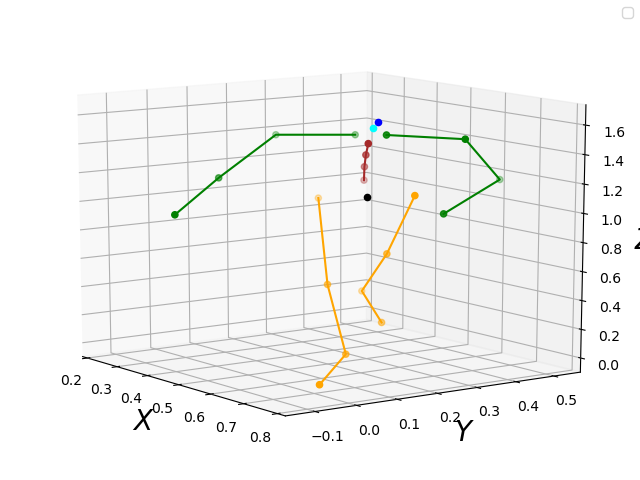

No handles with labels found to put in legend.


In [99]:
fig = plt.figure()
ax = Axes3D(fig)

for i in range(1000, 1001):
    for part in anatomy:
        qr = np.array([])
        for p in anatomy[part]:
        
#             q = np.array([(xsense_orientation.iloc[i]["orientation_{}_q0".format(p)]), 
#                   (xsense_orientation.iloc[i]["orientation_{}_q1".format(p)]),
#                   (xsense_orientation.iloc[i]["orientation_{}_q2".format(p)]), 
#                   (xsense_orientation.iloc[i]["orientation_{}_q2".format(p)])], dtype=np.float).reshape(-1, 4)
            v = np.array([(xsense_position.iloc[i]["position_{}_x".format(p)]), 
                      (xsense_position.iloc[i]["position_{}_y".format(p)]),
                      (xsense_position.iloc[i]["position_{}_z".format(p)])], dtype=np.float).reshape(-1, 3)
#             qr = np.append(qr, qrot(torch.from_numpy(q), torch.from_numpy(v)).reshape(-1, 3)).reshape(-1, 3)
            qr = np.append(qr, torch.from_numpy(v).reshape(-1, 3)).reshape(-1, 3)
        x, y, z = qr[:, 0], qr[:, 1], qr[:, 2]
        ax.plot(x, y, z, c=anatomy_color[part])
        ax.scatter3D(x, y, z, c=anatomy_color[part])
        
        
#     plt.pause(0.05)
ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)
plt.legend(loc="best")
plt.show()

<IPython.core.display.Javascript object>


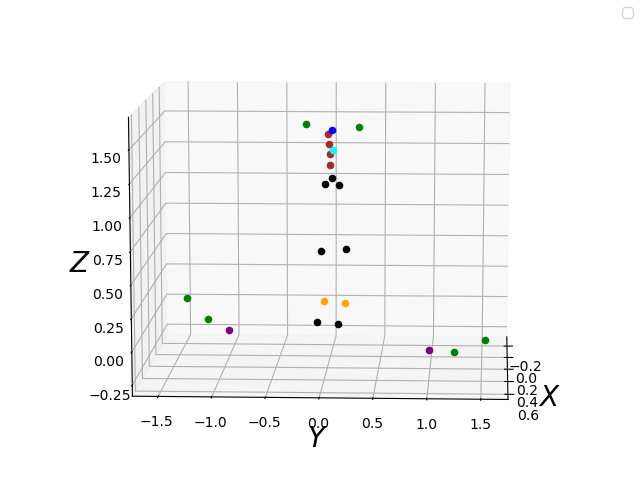

No handles with labels found to put in legend.


In [45]:
fig = plt.figure()
ax = Axes3D(fig)
for i in range(2000, 2001):
    for part in anatomy:
        q = np.array([(xsense_orientation.iloc[i]["orientation_{}_q0".format(part)]), 
              (xsense_orientation.iloc[i]["orientation_{}_q1".format(part)]),
              (xsense_orientation.iloc[i]["orientation_{}_q2".format(part)]), 
              (xsense_orientation.iloc[i]["orientation_{}_q2".format(part)])], dtype=np.float).reshape(-1, 4)
        v = np.array([(xsense_position.iloc[i]["position_{}_x".format(part)]), 
                  (xsense_position.iloc[i]["position_{}_y".format(part)]),
                  (xsense_position.iloc[i]["position_{}_z".format(part)])], dtype=np.float).reshape(-1, 3)
        qr = qrot(torch.from_numpy(q), torch.from_numpy(v))
        x, y, z = qr[-1, 0], qr[-1, 1], qr[-1, 2]
        ax.scatter3D(x, y, z, c=anatomy_color[part])
        
        
        
#     plt.pause(0.05)
ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)
plt.legend(loc="best")
plt.show()

In [ ]:

# qr.tolist()[0][0], qr.tolist()[0][1], qr.tolist()[0][2]

In [ ]:
 # syncing video according to videos as video is 25 fps

In [ ]:
xsense.shape

In [ ]:
v_cap = cv2.VideoCapture("input/Participant_541_Setup_A_Seq_5_Trial_3.camera1.mp4")
fps = v_cap.get(cv2.CAP_PROP_FPS)
frames = v_cap.get(cv2.CAP_PROP_FRAME_COUNT)
print("frame rate {} and video lenght secs {} ".format(fps, frames // fps))

In [ ]:
# Read until video is completed 
ind = 300
while(v_cap.isOpened()): 
      
    # Capture frame-by-frame 
    ret, frame = v_cap.read() 
    if ret == True: 
        
        frame = cv2.circle(frame, (1000, 700), 10, (255, 0, 0), 3)
        ind += 1
        # Display the resulting frame
        cv2.imshow('Frame', frame) 

        # Press Q on keyboard to  exit 
        if cv2.waitKey(int(fps)) & 0xFF == ord('q'): 
            break

    # Break the loop 
    else:  
        break
        
# When everything done, release  
# the video capture object 
v_cap.release() 
   
# Closes all the frames 
cv2.destroyAllWindows() 

In [ ]:
frame.shape

In [ ]:
%%writefile ./utils/__init__.py




In [ ]:
%%writefile ./utils/quaternion.py

# Copyright (c) 2018-present, Facebook, Inc.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
#

import torch

def qrot(q, v):
    """
    Rotate vector(s) v about the rotation described by quaternion(s) q.
    Expects a tensor of shape (*, 4) for q and a tensor of shape (*, 3) for v,
    where * denotes any number of dimensions.
    Returns a tensor of shape (*, 3).
    """
    assert q.shape[-1] == 4
    assert v.shape[-1] == 3
    assert q.shape[:-1] == v.shape[:-1]

    qvec = q[..., 1:]
    uv = torch.cross(qvec, v, dim=len(q.shape)-1)
    uuv = torch.cross(qvec, uv, dim=len(q.shape)-1)
    return (v + 2 * (q[..., :1] * uv + uuv))
    
    
def qinverse(q, inplace=False):
    # We assume the quaternion to be normalized
    if inplace:
        q[..., 1:] *= -1
        return q
    else:
        w = q[..., :1]
        xyz = q[..., 1:]
        return torch.cat((w, -xyz), dim=len(q.shape)-1)